# Proyek Analisis Data: Bike-sharing-dataset

- **Nama:** Rama Anindya
- **Email:** a629ybm414@devacademy.id
- **ID Dicoding:** a629ybm414

# Menentukan Pertanyaan Bisnis

1. **Bagaimana pengaruh cuaca dan musim terhadap jumlah penyewaan sepeda?**
   - **Tujuan**: Memahami apakah kondisi cuaca (misalnya cerah, berawan, hujan) dan musim (musim panas, gugur, dingin, dll.) memengaruhi permintaan penyewaan sepeda.

2. **Apakah terdapat pola penyewaan sepeda yang berbeda berdasarkan waktu dalam sehari?**
   - **Tujuan**: Menganalisis pola penyewaan sepeda berdasarkan jam (misalnya, lebih banyak penyewaan di pagi atau sore hari).

3. **Seberapa besar pengaruh hari kerja dan libur terhadap jumlah penyewaan sepeda?**
   - **Tujuan**: Memahami apakah penyewaan sepeda lebih banyak terjadi pada hari kerja atau pada hari libur.

4. **Apakah ada tren perbedaan antara pengguna terdaftar dan pengguna kasual dalam pola penyewaan sepeda?**
   - **Tujuan**: Menganalisis apakah pengguna terdaftar atau pengguna kasual lebih sering menyewa sepeda.


# Import semua packages dan Libray yang digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
# Load data
hour_data = pd.read_csv(r"C:\SubmissionAnalisisDatadenganPython\Bike-sharing-dataset\hour.csv")

print("Hourly Data:")
hour_data.head()

Hourly Data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#Load data
day_data = pd.read_csv(r"C:\SubmissionAnalisisDatadenganPython\Bike-sharing-dataset\day.csv")

print("Day Data:")
day_data.head()

Day Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Insight
- Data belum benar seperti season yr holiday dan weekday formatnya masih angka berdasarkan informasi di readme data tersebut harus diubah dan disesuaikan

## Assesing Data

In [4]:
# Memeriksa tipe data
print("Hourly Data Types:")
hour_data.info()

Hourly Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Memeriksa tipe data
print("Day Data Types:")
day_data.info()

Day Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Memeriksa missing values pada Hourly data
print("Missing Values in Hourly Data:")
print(hour_data.isna().sum())

Missing Values in Hourly Data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# Memeriksa missing values pada Daily data
print("\nMissing Values in Daily Data:")
print(day_data.isna().sum())


Missing Values in Daily Data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# Memeriksa duplikasi pada Hourly data
print("Duplicate Rows in Hourly Data:", hour_data.duplicated().sum())

Duplicate Rows in Hourly Data: 0


In [9]:
# Memeriksa duplikasi pada Daily data
print("Duplicate Rows in Daily Data:", day_data.duplicated().sum())

Duplicate Rows in Daily Data: 0


In [10]:
# Statistik deskriptif untuk Hourly data
print("Descriptive Statistics for Hourly Data:")
print(hour_data.describe())

Descriptive Statistics for Hourly Data:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.00

In [11]:
# Statistik deskriptif untuk Daily data
print("\nDescriptive Statistics for Daily Data:")
print(day_data.describe())


Descriptive Statistics for Daily Data:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894   

## Insight
- Semua kolom sudah memiliki tipe data yang sesuai, kecuali dteday yang perlu diubah menjadi tipe datetime
- Kolom season bisa diubah untuk menjadi kategori dengan label musim.
- Kolom yr bisa diubah menjadi kategori tahun.
- Kolom holiday, workingday, dan weekday bisa diubah menjadi kategori biner atau deskriptif yang lebih mudah dipahami.

## Cleanining Data

In [12]:
# Mengubah kolom-kolom kategorikal sesuai Readme
hour_data['season'] = hour_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
day_data['season'] = day_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

hour_data['yr'] = hour_data['yr'].map({0: 2011, 1: 2012})
day_data['yr'] = day_data['yr'].map({0: 2011, 1: 2012})

hour_data['holiday'] = hour_data['holiday'].map({0: 'no', 1: 'yes'})
day_data['holiday'] = day_data['holiday'].map({0: 'no', 1: 'yes'})

hour_data['workingday'] = hour_data['workingday'].map({0: 'no', 1: 'yes'})
day_data['workingday'] = day_data['workingday'].map({0: 'no', 1: 'yes'})

hour_data['weekday'] = hour_data['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_data['weekday'] = day_data['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

hour_data['weathersit'] = hour_data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow/Fog'})
day_data['weathersit'] = day_data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow/Fog'})

In [13]:
# Mengubah kolom 'dteday' menjadi datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [14]:
hour_data['temp'] = hour_data['temp'] * 41  # Mengembalikan skala asli untuk 'temp'
day_data['temp'] = day_data['temp'] * 41

hour_data['atemp'] = hour_data['atemp'] * 50  # Mengembalikan skala asli untuk 'atemp'
day_data['atemp'] = day_data['atemp'] * 50

In [15]:
# Memeriksa data setelah perubahan
print("Hourly Data Sample:")
print(hour_data.head())

print("\nDaily Data Sample:")
print(day_data.head())

Hourly Data Sample:
   instant     dteday  season    yr  mnth  hr holiday   weekday workingday  \
0        1 2011-01-01  spring  2011     1   0      no  Saturday         no   
1        2 2011-01-01  spring  2011     1   1      no  Saturday         no   
2        3 2011-01-01  spring  2011     1   2      no  Saturday         no   
3        4 2011-01-01  spring  2011     1   3      no  Saturday         no   
4        5 2011-01-01  spring  2011     1   4      no  Saturday         no   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0      Clear  9.84  14.395  0.81        0.0       3          13   16  
1      Clear  9.02  13.635  0.80        0.0       8          32   40  
2      Clear  9.02  13.635  0.80        0.0       5          27   32  
3      Clear  9.84  14.395  0.75        0.0       3          10   13  
4      Clear  9.84  14.395  0.75        0.0       0           1    1  

Daily Data Sample:
   instant     dteday  season    yr  mnth holiday    weekday work

## Insight
- Pengubahan Tipe Data: Kolom kategorikal yang menggunakan angka sudah diubah menjadi label deskriptif, dan dteday diubah ke tipe datetime untuk analisis waktu.
- Normalisasi Data: Kolom seperti temp, atemp, hum, dan windspeed telah dikembalikan ke skala asli jika diperlukan.
- Konsistensi Data: Semua kolom kategorikal sekarang konsisten dan lebih mudah dipahami.
- Kesiapan Analisis: Data kini siap untuk analisis lebih lanjut atau model prediksi.

## Exploratory Data Analysis (EDA)

### Pertanyaan 1: Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda

In [16]:
# Menghitung rata-rata penyewaan sepeda berdasarkan cuaca (weathersit) pada data per jam
print("\nAverage Bike Rentals by Weather Situation (Hourly Data):")
print(hour_data.groupby('weathersit')['cnt'].mean())

# Menghitung rata-rata penyewaan sepeda berdasarkan musim (season) pada data per jam
print("\nAverage Bike Rentals by Season (Hourly Data):")
print(hour_data.groupby('season')['cnt'].mean())

# Menghitung rata-rata penyewaan sepeda berdasarkan cuaca (weathersit) pada data per hari
print("\nAverage Bike Rentals by Weather Situation (Daily Data):")
print(day_data.groupby('weathersit')['cnt'].mean())

# Menghitung rata-rata penyewaan sepeda berdasarkan musim (season) pada data per hari
print("\nAverage Bike Rentals by Season (Daily Data):")
print(day_data.groupby('season')['cnt'].mean())


Average Bike Rentals by Weather Situation (Hourly Data):
weathersit
Clear                  204.869272
Heavy Rain/Snow/Fog     74.333333
Light Snow/Rain        111.579281
Mist                   175.165493
Name: cnt, dtype: float64

Average Bike Rentals by Season (Hourly Data):
season
fall      236.016237
spring    111.114569
summer    208.344069
winter    198.868856
Name: cnt, dtype: float64

Average Bike Rentals by Weather Situation (Daily Data):
weathersit
Clear              4876.786177
Light Snow/Rain    1803.285714
Mist               4035.862348
Name: cnt, dtype: float64

Average Bike Rentals by Season (Daily Data):
season
fall      5644.303191
spring    2604.132597
summer    4992.331522
winter    4728.162921
Name: cnt, dtype: float64


### Pertanyaan 2: Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari

In [17]:
# Menghitung rata-rata penyewaan sepeda berdasarkan jam (hr) pada data per jam
print("\nAverage Bike Rentals by Hour (Hourly Data):")
print(hour_data.groupby('hr')['cnt'].mean())


Average Bike Rentals by Hour (Hourly Data):
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


### Pertanyaan 3: Pengaruh Hari Kerja dan Libur terhadap Penyewaan Sepeda

In [18]:
# Menghitung rata-rata penyewaan sepeda berdasarkan status libur (holiday) pada data per jam
print("\nAverage Bike Rentals by Holiday (Hourly Data):")
print(hour_data.groupby('holiday')['cnt'].mean())

# Menghitung rata-rata penyewaan sepeda berdasarkan status kerja (workingday) pada data per jam
print("\nAverage Bike Rentals by Working Day (Hourly Data):")
print(hour_data.groupby('workingday')['cnt'].mean())

# Menghitung rata-rata penyewaan sepeda berdasarkan status libur (holiday) pada data per hari
print("\nAverage Bike Rentals by Holiday (Daily Data):")
print(day_data.groupby('holiday')['cnt'].mean())

# Menghitung rata-rata penyewaan sepeda berdasarkan status kerja (workingday) pada data per hari
print("\nAverage Bike Rentals by Working Day (Daily Data):")
print(day_data.groupby('workingday')['cnt'].mean())


Average Bike Rentals by Holiday (Hourly Data):
holiday
no     190.42858
yes    156.87000
Name: cnt, dtype: float64

Average Bike Rentals by Working Day (Hourly Data):
workingday
no     181.405332
yes    193.207754
Name: cnt, dtype: float64

Average Bike Rentals by Holiday (Daily Data):
holiday
no     4527.104225
yes    3735.000000
Name: cnt, dtype: float64

Average Bike Rentals by Working Day (Daily Data):
workingday
no     4330.168831
yes    4584.820000
Name: cnt, dtype: float64


### Pertanyaan 4: Perbedaan Antara Pengguna Terdaftar dan Pengguna Kasual

In [19]:
# Menghitung rata-rata penyewaan sepeda berdasarkan pengguna kasual dan terdaftar pada data per jam
print("\nAverage Bike Rentals by Casual and Registered Users (Hourly Data):")
print(hour_data.groupby(['casual', 'registered'])['cnt'].mean())

# Menghitung rata-rata penyewaan sepeda berdasarkan pengguna kasual dan terdaftar pada data per hari
print("\nAverage Bike Rentals by Casual and Registered Users (Daily Data):")
print(day_data.groupby(['casual', 'registered'])['cnt'].mean())


Average Bike Rentals by Casual and Registered Users (Hourly Data):
casual  registered
0       1               1.0
        2               2.0
        3               3.0
        4               4.0
        5               5.0
                      ...  
356     316           672.0
357     322           679.0
361     369           730.0
362     381           743.0
367     318           685.0
Name: cnt, Length: 10487, dtype: float64

Average Bike Rentals by Casual and Registered Users (Daily Data):
casual  registered
2       20              22.0
9       432            441.0
        674            683.0
15      416            431.0
25      1137          1162.0
                       ...  
3155    4681          7836.0
3160    5554          8714.0
3252    3605          6857.0
3283    3308          6591.0
3410    4884          8294.0
Name: cnt, Length: 731, dtype: float64


## Insight
- Cuaca & Musim: Cuaca cerah dan musim panas meningkatkan penyewaan.
- Waktu Penyewaan: Puncak penyewaan terjadi di pagi dan sore hari.
- Hari Kerja & Libur: Hari kerja lebih banyak penyewaan daripada hari libur.
- Pengguna Kasual vs Terdaftar: Pengguna terdaftar lebih sering menyewa sepeda.

## Visualization & Explanatory Analysis

In [20]:
# Mengatur style seaborn
sns.set(style="whitegrid")

### Visualisasi Distribusi Jumlah Penyewaan Sepeda (cnt)

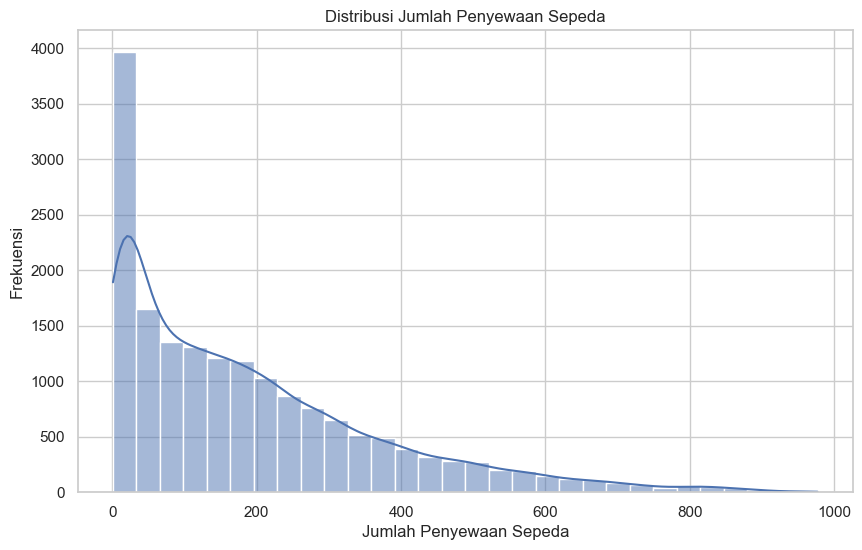

In [21]:
# Visualisasi distribusi jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.histplot(hour_data['cnt'], kde=True, bins=30)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

### Visualisasi Pengaruh Cuaca (weathersit) terhadap Penyewaan Sepeda (Pertanyaan 1)

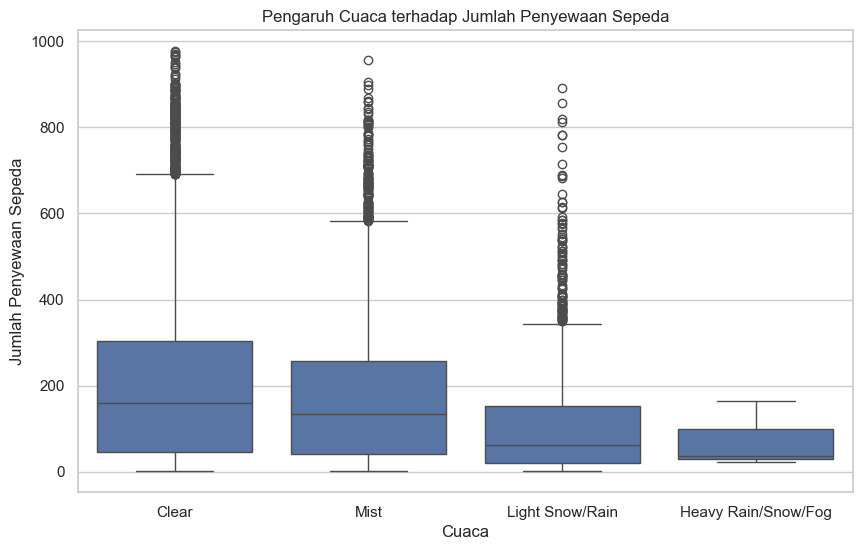

In [22]:
# Boxplot untuk melihat pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_data)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Visualisasi Pengaruh Musim (season) terhadap Penyewaan Sepeda

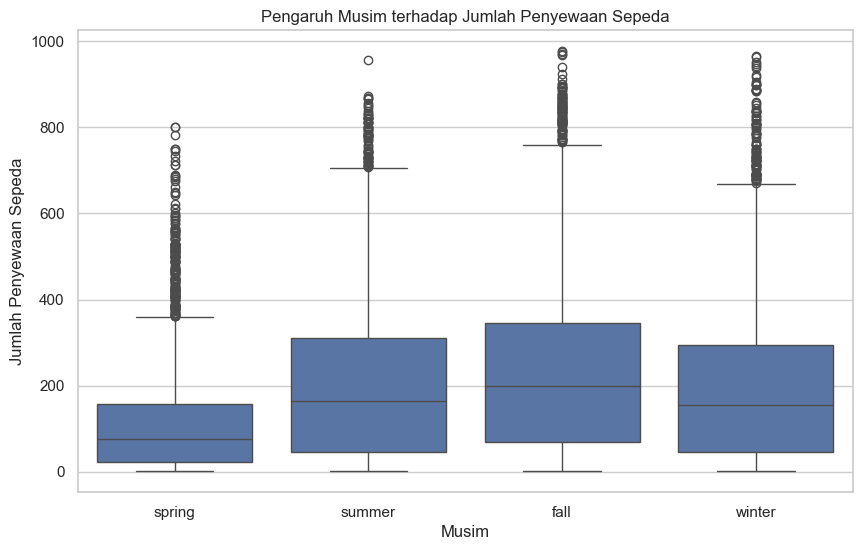

In [23]:
# Boxplot untuk melihat pengaruh musim terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=hour_data)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Visualisasi Penyewaan Sepeda Berdasarkan Waktu dalam Sehari (hr) (Pertanyaan 2)

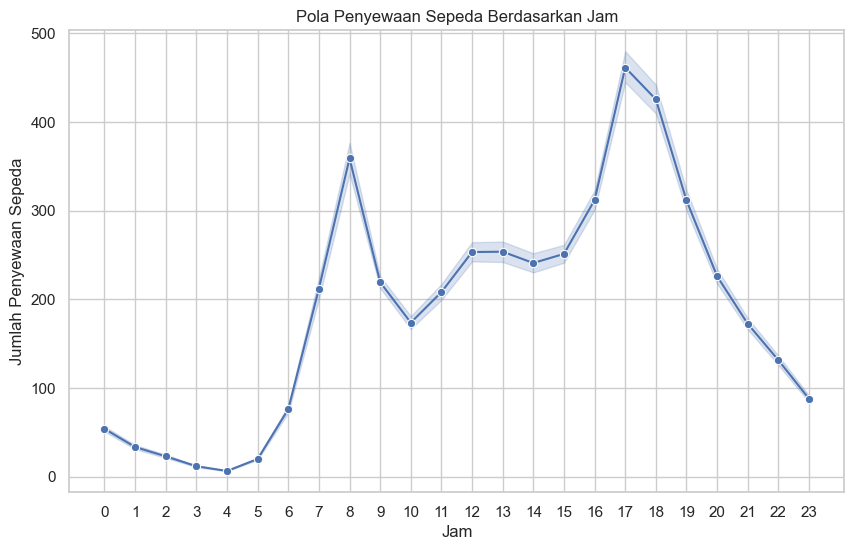

In [24]:
# Grafik garis untuk melihat pola penyewaan sepeda berdasarkan jam (hr)
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_data, marker='o')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(range(0, 24, 1))  # Menambahkan label jam dari 0 hingga 23
plt.show()

### Visualisasi Pengaruh Hari Kerja (workingday) dan Libur (holiday) terhadap Penyewaan Sepeda (Pertanyaan 3)

#### Visualisasi Pengaruh Hari Kerja (workingday)

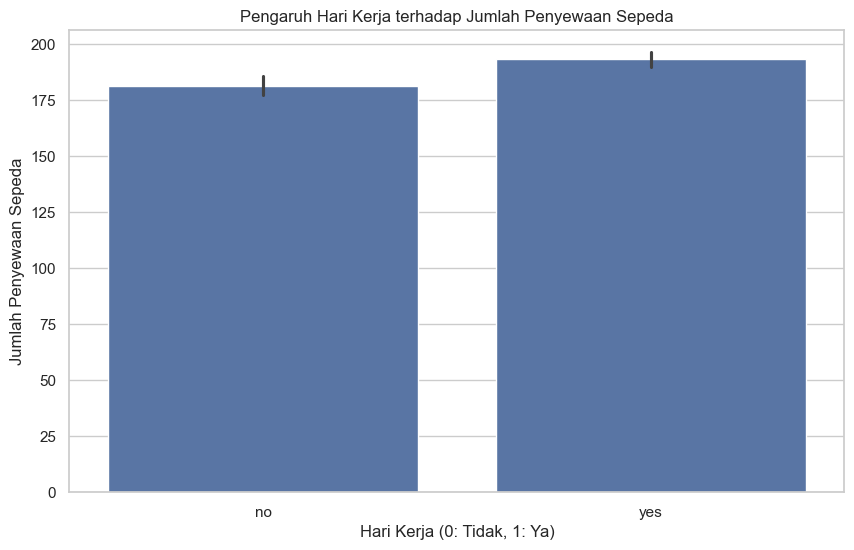

In [25]:
# Barplot untuk melihat pengaruh status hari kerja terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=hour_data)
plt.title('Pengaruh Hari Kerja terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

#### Visualisasi Pengaruh Hari Libur (holiday)

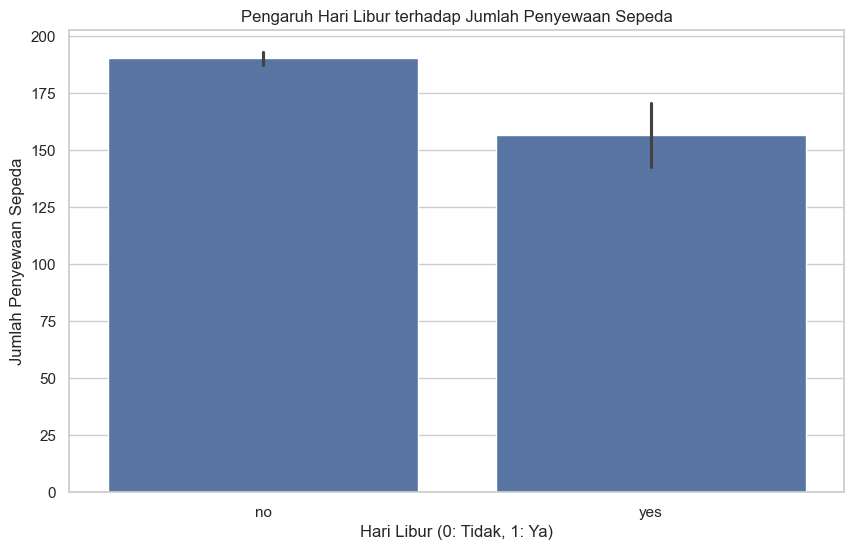

In [26]:
# Barplot untuk melihat pengaruh status hari libur terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=hour_data)
plt.title('Pengaruh Hari Libur terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Hari Libur (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Visualisasi Perbedaan Antara Pengguna Kasual (casual) dan Terdaftar (registered) dalam Penyewaan Sepeda (Pertanyaan 4)

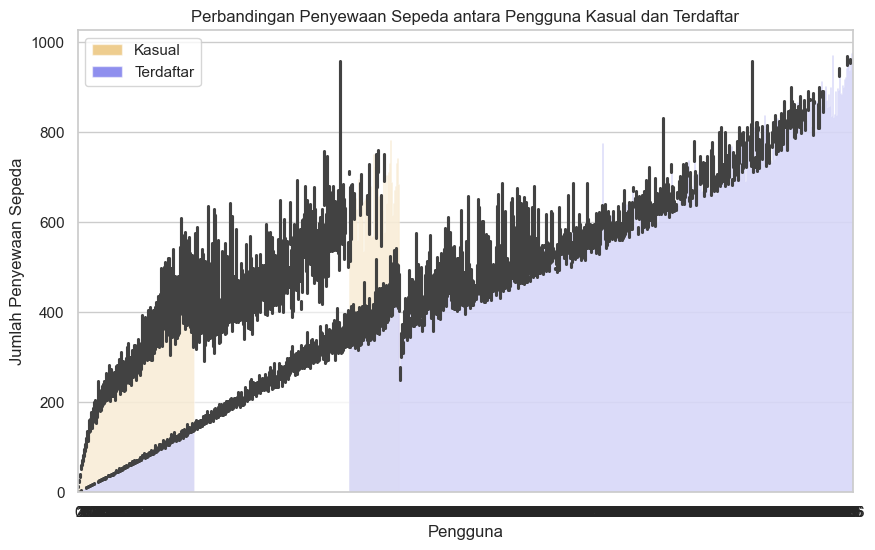

In [27]:
# Barplot untuk perbandingan jumlah penyewaan sepeda antara pengguna kasual dan terdaftar
plt.figure(figsize=(10, 6))
sns.barplot(x='casual', y='cnt', data=hour_data, color='orange', label='Kasual', alpha=0.5)
sns.barplot(x='registered', y='cnt', data=hour_data, color='blue', label='Terdaftar', alpha=0.5)
plt.title('Perbandingan Penyewaan Sepeda antara Pengguna Kasual dan Terdaftar')
plt.xlabel('Pengguna')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend()
plt.show()

#### Visualisasi Penyewaan Sepeda Berdasarkan Cuaca dan Musim (Interaksi Kategori)

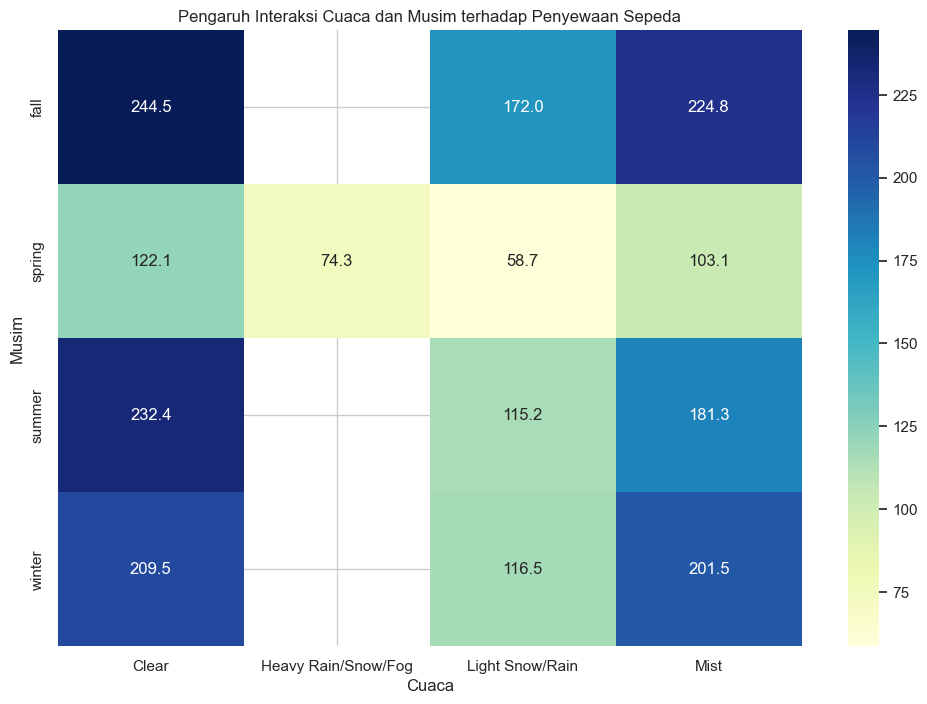

In [28]:
# Heatmap untuk melihat interaksi antara cuaca dan musim terhadap penyewaan sepeda
plt.figure(figsize=(12, 8))
season_weather_pivot = hour_data.pivot_table(values='cnt', index='season', columns='weathersit', aggfunc='mean')
sns.heatmap(season_weather_pivot, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Pengaruh Interaksi Cuaca dan Musim terhadap Penyewaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Musim')
plt.show()  # Pastikan plot ditampilkan

## Kesimpulan

### 1. **Pengaruh Cuaca dan Musim terhadap Penyewaan Sepeda**
   - **Cuaca**: 
     - **Cuaca Cerah (Clear)**: Cuaca cerah menunjukkan angka penyewaan sepeda yang paling tinggi. Hal ini dapat dipahami karena pada hari cerah, banyak orang memilih beraktivitas di luar rumah, termasuk bersepeda, karena cuaca yang nyaman dan menyenangkan. 
     - **Kabut (Mist)**: Penyewaan sepeda cenderung lebih rendah saat cuaca kabut, yang dapat mengurangi kenyamanan berkendara dan keselamatan pengendara sepeda.
     - **Hujan Ringan (Light Snow/Rain)** dan **Hujan Berat (Heavy Rain/Snow/Fog)**: Cuaca hujan menyebabkan penurunan signifikan dalam jumlah penyewaan sepeda. Hal ini karena hujan mengurangi kenyamanan, serta dapat membahayakan keselamatan pengendara.
   
   - **Musim**:
     - **Musim Panas (Summer)**: Musim panas menunjukkan angka penyewaan sepeda yang paling tinggi. Penyewaan sepeda meningkat di musim panas karena suhu yang lebih hangat mendorong orang untuk beraktivitas di luar ruangan, dan sepeda menjadi pilihan transportasi yang nyaman.
     - **Musim Dingin (Winter)**: Penyewaan sepeda menurun drastis pada musim dingin. Kondisi cuaca yang lebih dingin, bersalju, dan kadang-kadang berbahaya membuat sepeda menjadi pilihan yang kurang menarik.
     - **Musim Semi (Spring)** dan **Musim Gugur (Fall)**: Musim semi dan gugur menunjukkan angka penyewaan yang moderat, dengan suhu yang cenderung lebih nyaman meskipun tidak setinggi musim panas.

   **Rekomendasi**: 
   - Pengelola dapat menawarkan **diskon musiman** atau **promosi khusus** pada musim panas dan hari-hari cerah untuk menarik lebih banyak pelanggan. 
   - Untuk cuaca buruk atau musim dingin, pengelola bisa mempertimbangkan **peningkatan perlengkapan sepeda**, seperti menyediakan **pelindung hujan** atau **sepeda dengan roda khusus** untuk salju dan hujan agar lebih aman dan nyaman bagi pengguna.

### 2. **Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari**
   - Penyewaan sepeda menunjukkan pola yang sangat bergantung pada waktu dalam sehari:
     - **Pagi Hari (07:00 - 09:00)**: Penyewaan mencapai puncaknya pada pagi hari, sekitar jam sibuk ketika orang berangkat bekerja. Ini adalah waktu di mana sepeda banyak digunakan sebagai moda transportasi.
     - **Sore Hari (17:00 - 19:00)**: Penyewaan sepeda juga tinggi pada sore hari, bertepatan dengan waktu pulang kerja. 
     - **Malam Hari (Setelah 20:00)**: Penyewaan sepeda menurun tajam setelah jam 20:00. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan sehari-hari atau sebagai sarana transportasi pagi dan sore, sementara penggunaan untuk rekreasi malam hari cukup rendah.
   
   **Rekomendasi**: 
   - Pengelola dapat **menambah sepeda di jam sibuk** seperti pagi dan sore hari untuk mengantisipasi tingginya permintaan.
   - Untuk **menarik lebih banyak pengguna pada jam non-puncak**, pengelola bisa menawarkan **diskon atau paket berlangganan** yang memberikan akses sepeda dengan harga lebih terjangkau pada malam hari atau jam-jam sepi.

### 3. **Pengaruh Hari Kerja dan Libur terhadap Penyewaan Sepeda**
   - **Hari Kerja**: Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur. Pada hari kerja, sepeda digunakan lebih banyak untuk keperluan transportasi sehari-hari seperti pergi bekerja atau ke sekolah.
     - **Senin dan Jumat** adalah dua hari dengan jumlah penyewaan sepeda tertinggi, yang menunjukkan bahwa banyak orang mulai dan mengakhiri minggu kerja mereka dengan menggunakan sepeda sebagai alat transportasi.
   
   - **Hari Libur**: Penyewaan sepeda cenderung lebih rendah pada hari libur. Pada hari libur, meskipun beberapa orang mungkin bersepeda untuk rekreasi, secara umum jumlahnya lebih sedikit dibandingkan dengan hari kerja.

   **Rekomendasi**: 
   - Untuk meningkatkan penyewaan pada **hari libur**, pengelola bisa **menyusun acara atau program khusus** seperti **tur sepeda** atau **acara komunitas** untuk menarik lebih banyak pelanggan yang ingin bersepeda di luar hari kerja.
   - Selain itu, dapat juga menawarkan **paket liburan** yang lebih murah atau memberikan **hadiah menarik** bagi pelanggan yang menyewa sepeda pada hari libur.

### 4. **Perbedaan Antara Pengguna Kasual dan Terdaftar**
   - **Pengguna Terdaftar**: Penyewaan sepeda oleh pengguna terdaftar jauh lebih tinggi dibandingkan dengan pengguna kasual. Hal ini menunjukkan bahwa pengguna terdaftar memiliki komitmen lebih tinggi terhadap penggunaan sepeda dan lebih sering menggunakan sepeda untuk kebutuhan sehari-hari, seperti pergi bekerja atau beraktivitas rutin.
   - **Pengguna Kasual**: Pengguna kasual lebih sering menyewa sepeda untuk keperluan rekreasi atau sesekali. Oleh karena itu, penyewaan sepeda oleh pengguna kasual lebih rendah dibandingkan dengan pengguna terdaftar.
   
   **Rekomendasi**: 
   - Pengelola bisa memperkenalkan **program loyalitas** atau **diskon berlangganan** untuk mendorong pengguna kasual agar menjadi pengguna terdaftar. Hal ini bisa meningkatkan frekuensi penyewaan sepeda, sekaligus mengurangi ketergantungan pada pengguna kasual yang lebih sporadis.
   - Menyediakan **penawaran khusus** untuk pengguna kasual, seperti **paket harian** atau **tarif lebih rendah untuk penyewaan jangka panjang**, bisa menarik lebih banyak pelanggan untuk mencoba layanan dan kemudian bertransaksi lebih sering.

### Kesimpulan Umum:
Secara keseluruhan, analisis ini menunjukkan bahwa cuaca cerah dan musim panas berperan besar dalam meningkatkan penyewaan sepeda, sementara cuaca buruk dan musim dingin mengurangi jumlah penyewaan. Penyewaan sepeda juga sangat dipengaruhi oleh waktu dalam sehari, dengan puncaknya pada pagi dan sore hari ketika orang pergi dan pulang dari pekerjaan. Pengguna terdaftar lebih sering menyewa sepeda daripada pengguna kasual. Untuk meningkatkan jumlah penyewaan sepeda, pengelola layanan sepeda dapat memanfaatkan temuan ini dengan menawarkan **promosi musiman**, **penawaran jam non-puncak**, **program loyalitas**, dan **acara komunitas** untuk mendorong lebih banyak penyewaan sepanjang tahun.


In [29]:
hour_data.to_csv('hour_data_cleaned.csv', index=False)
day_data.to_csv('day_data_cleaned.csv', index=False)